Proyecto Verificar la salud de las plantas de tomate usando CNN 

In [41]:
import numpy as np
import pandas as pd
from keras.utils import to_categorical
import tensorflow as tf
import random
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [42]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, array_to_img, img_to_array
from tensorflow.keras.models import Sequential
from glob import glob
#from tensorflow.keras.applications.inception_v3 import InceptionV3

Importamos el dataset y lo ponemos de tamaño 225x225 las imagenes

In [43]:
img_size = [225, 225]
#entrenamos inceptionv3 con las imagenes de imagenet para reconocimiento
inception = InceptionV3(input_shape=img_size + [3], weights='imagenet', include_top=False)

In [44]:
#con esto evita
for layer in inception.layers:
    layer.trainable = False

In [45]:
folder = glob('dataset/train/*')
folder

['dataset/train\\Bacterial_spot',
 'dataset/train\\Early_blight',
 'dataset/train\\healthy',
 'dataset/train\\Late_blight',
 'dataset/train\\Leaf_Mold',
 'dataset/train\\Septoria_leaf_spot',
 'dataset/train\\Spider_mites Two-spotted_spider_mite',
 'dataset/train\\Target_Spot',
 'dataset/train\\Tomato_mosaic_virus',
 'dataset/train\\Tomato_Yellow_Leaf_Curl_Virus']

In [46]:
#capas para el  modelo
x = Flatten()(inception.output)
prediction = Dense(len(folder), activation='softmax')(x)

In [47]:
modelo = Model(inputs=inception.input, outputs=prediction)


In [48]:
modelo.compile(
  loss='categorical_crossentropy',
  optimizer='SGD',
  metrics=['accuracy']
)


In [49]:


train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [50]:
#training y testing
training_set = train_datagen.flow_from_directory('dataset/train',
                                                 target_size = (225, 225),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('dataset/train',
                                            target_size = (225, 225),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 10000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [51]:
result = modelo.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)


Epoch 1/10
313/313 [==============================] - 363s 1s/step - loss: 13.1376 - accuracy: 0.5412 - val_loss: 3.0084 - val_accuracy: 0.7360
Epoch 2/10
313/313 [==============================] - 359s 1s/step - loss: 4.1050 - accuracy: 0.7222 - val_loss: 6.8532 - val_accuracy: 0.5737
Epoch 3/10
313/313 [==============================] - 363s 1s/step - loss: 3.2227 - accuracy: 0.7557 - val_loss: 2.0667 - val_accuracy: 0.8188
Epoch 4/10
313/313 [==============================] - 371s 1s/step - loss: 2.6107 - accuracy: 0.7882 - val_loss: 1.8201 - val_accuracy: 0.8366
Epoch 5/10
313/313 [==============================] - 358s 1s/step - loss: 1.9680 - accuracy: 0.8239 - val_loss: 1.0124 - val_accuracy: 0.8799
Epoch 6/10
313/313 [==============================] - 316s 1s/step - loss: 1.8220 - accuracy: 0.8306 - val_loss: 1.5934 - val_accuracy: 0.8333
Epoch 7/10
313/313 [==============================] - 318s 1s/step - loss: 1.7866 - accuracy: 0.8336 - val_loss: 1.0344 - val_accuracy: 0.874

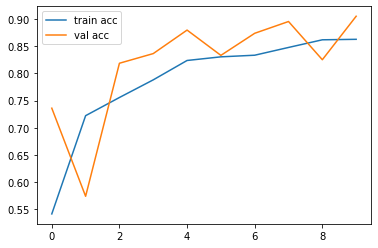

In [52]:
# Precision
plt.plot(result.history['accuracy'], label='train acc')
plt.plot(result.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [53]:

result.history['accuracy']


[0.5411999821662903,
 0.7221999764442444,
 0.7556999921798706,
 0.7882000207901001,
 0.8238999843597412,
 0.8306000232696533,
 0.8335999846458435,
 0.8478999733924866,
 0.8619999885559082,
 0.8629000186920166]

In [54]:
result.history['val_accuracy']

[0.7360000014305115,
 0.5737000107765198,
 0.8187999725341797,
 0.8366000056266785,
 0.8798999786376953,
 0.833299994468689,
 0.8740000128746033,
 0.8956999778747559,
 0.8252999782562256,
 0.9053999781608582]